<h2 align="center">ПРИЛОЖЕНИЕ Б</h2>

**Построение ARIMA моделей**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
from datetime import date, timedelta, datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Загрузка данных
end = pd.to_datetime('today').strftime('%Y-%m-%d')
start = '1990-01-01'
df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


### АДДИТИВНАЯ МОДЕЛЬ ВРЕМЕННЫХ РЯДОВ

In [5]:
# Установим столбец с датами в качестве индекса
df.index = pd.to_datetime(df.index)

# Выбор столбца с ценами открытия
open_prices = df['Open']

# Определение периода временного ряда
period = 252  # количество рабочих дней в году

# Построение аддитивной модели временного ряда
result = seasonal_decompose(open_prices, model='additive', period=period)

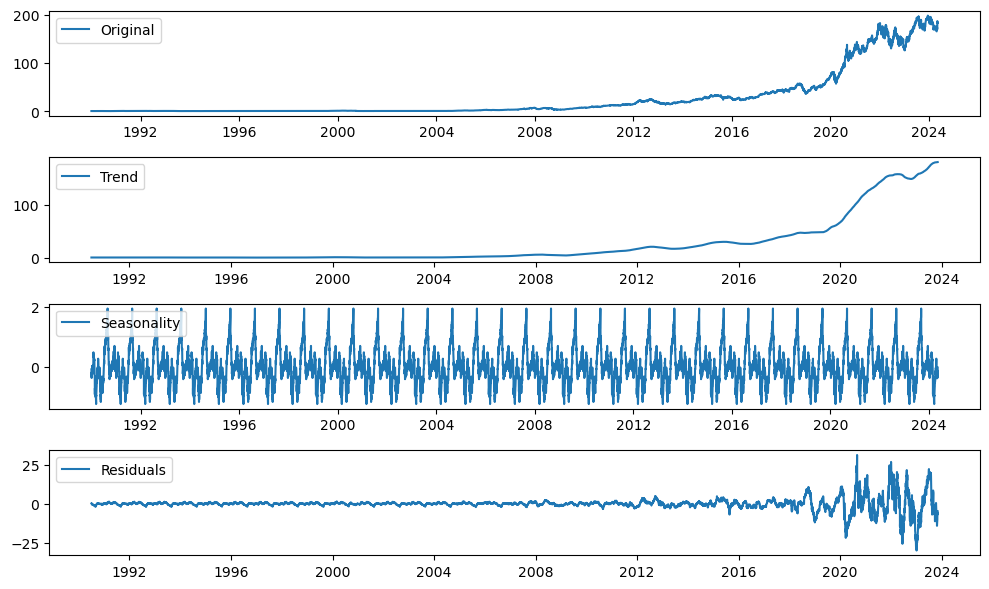

In [6]:
# Визуализация модели
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(open_prices, label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### АРИМА НА ТЕСТОВОЙ И ТРЕНИРОВОЧНОЙ ВЫБОРКЕ И ВИЗУАЛИЗАЦИЯ

In [18]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Получение данных
end = pd.Timestamp.today().strftime('%Y-%m-%d')
start = '1990-01-01'
df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [19]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263078,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.264843,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.265727,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266610,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268375,101572800
...,...,...,...,...,...,...
2024-05-02,172.509995,173.419998,170.889999,173.029999,173.029999,94214900
2024-05-03,186.649994,187.000000,182.660004,183.380005,183.380005,163224100
2024-05-06,182.350006,184.199997,180.419998,181.710007,181.710007,78569700


In [20]:
data = df['Open']

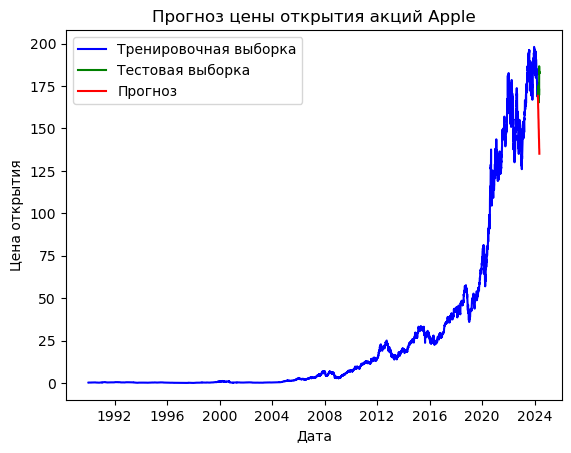

R^2: -19.168176791452918
MAE: 19.594032873645954
MSE: 571.7573053775542


In [25]:
# Определение даты начала тестовой выборки
test_start_date = data.index[-30]

# Разделение данных на тренировочную и тестовую выборки
train = data[data.index < test_start_date]
test = data[data.index >= test_start_date]

# Построение модели ARIMA с автоподбором параметров
model = ARIMA(train, order=(5,2,0))
model_fit = model.fit()

# Прогноз на 30 дней вперед
forecast = model_fit.forecast(steps=30)

# Оценка модели
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
r2 = r2_score(test, predictions)
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
mape = np.mean(np.abs(predictions - test)/np.abs(test))

# Визуализация
plt.plot(train.index, train, label='Тренировочная выборка', color='blue')
plt.plot(test.index, test, label='Тестовая выборка', color='green')
plt.plot(test.index, predictions, label='Прогноз', color='red')
plt.xlabel('Дата')
plt.ylabel('Цена открытия')
plt.title('Прогноз цены открытия акций Apple')
plt.legend()
plt.show()

# Вывод метрик
print("R^2:", r2)
print("MAE:", mae)
print("MSE:", mse)

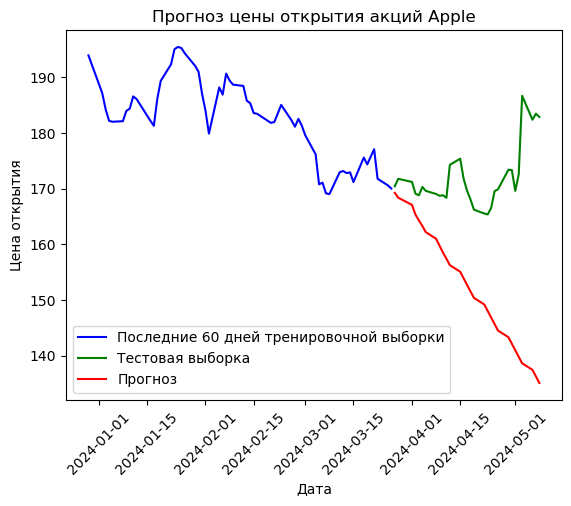

In [26]:
# Визуализация
plt.plot(train.index[-60:], train[-60:], label='Последние 60 дней тренировочной выборки', color='blue')
plt.plot(test.index, test, label='Тестовая выборка', color='green')
plt.plot(test.index, predictions, label='Прогноз', color='red')
plt.xlabel('Дата')
plt.ylabel('Цена открытия')
plt.title('Прогноз цены открытия акций Apple')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Модель ARIMA

In [27]:
import yfinance as yf
from datetime import date, timedelta, datetime

In [39]:
end = date.today().strftime('%Y-%m-%d')
start = '1990-01-01'

df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [40]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [41]:
df.index = pd.to_datetime(df.index)

In [42]:
data = df['Open']

In [43]:
data

Date
1990-01-02      0.314732
1990-01-03      0.339286
1990-01-04      0.341518
1990-01-05      0.337054
1990-01-08      0.334821
                 ...    
2024-05-02    172.509995
2024-05-03    186.649994
2024-05-06    182.350006
2024-05-07    183.449997
2024-05-08    182.850006
Name: Open, Length: 8654, dtype: float64

In [44]:
# функция для автоматического подбора параметров модели
from pmdarima.arima import auto_arima

# Подбор параметров
model_arima = auto_arima(data, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.61 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=31154.182, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=28557.928, Time=0.45 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=31152.182, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=27531.203, Time=0.58 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=26799.448, Time=0.77 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=26379.037, Time=0.96 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=26044.915, Time=1.24 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.48 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.86 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=26042.918, Time=0.68 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=26377.039, Time=0.56 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.24 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf,

In [45]:
data = df['Open'].asfreq('D')

In [46]:
# Создание и обучение модели
model = ARIMA(data, order=model_arima.order, freq='D')
model_fit = model.fit()

In [47]:
# Прогнозирование
forecast_index = pd.date_range(start=data.index[-1], periods=60+1, freq='D')[1:]
forecast = model_fit.forecast(steps=60, index=forecast_index)

In [48]:
sample = data.iloc[-60:]

In [49]:
sample.fillna(method='ffill', inplace=True)

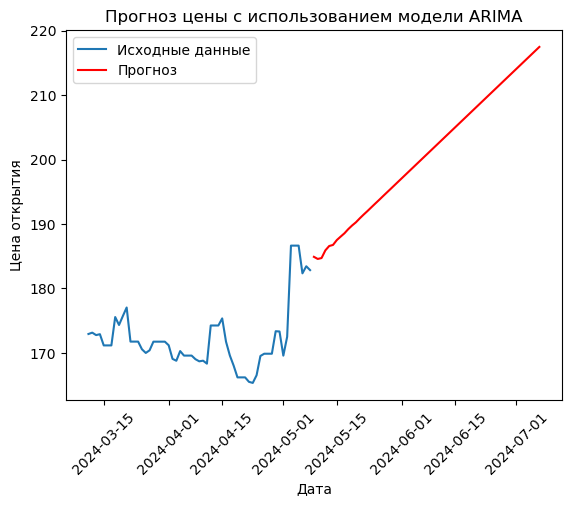

In [50]:
# График исходных данных
plt.plot(sample.index, sample, label='Исходные данные')

# График прогнозов
plt.plot(forecast.index, forecast, color='red', label='Прогноз')

plt.xlabel('Дата')
plt.ylabel('Цена открытия')
plt.title('Прогноз цены с использованием модели ARIMA')
plt.xticks(rotation=45)
plt.legend()
plt.show()

ха-ха-ха какая оптимистичная модель

In [51]:
df.reset_index(inplace=True)
df.columns = df.columns.str.lower()

In [52]:
df.head()

,date,open,high,low,close,adj close,volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263078,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.264843,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.265727,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266610,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268375,101572800


In [53]:
df

,date,open,high,low,close,adj close,volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263078,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.264843,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.265727,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266610,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268375,101572800
...,...,...,...,...,...,...,...
8649,2024-05-02,172.509995,173.419998,170.889999,173.029999,173.029999,94214900
8650,2024-05-03,186.649994,187.000000,182.660004,183.380005,183.380005,163224100
8651,2024-05-06,182.350006,184.199997,180.419998,181.710007,181.710007,78569700
8652,2024-05-07,183.449997,184.899994,181.320007,182.399994,182.399994,77305800
